# Tutorial de Proyecto de Preprocesamiento de Datos

- Descarga los datos de Airbnb de Nueva York de Kaggle.com.
- Realiza un EDA completo incluyendo todos los pasos del proceso.
- Escribe las conclusiones de cada paso y analiza los resultados sobre las relaciones entre las variables.

### Imports

In [136]:
import ipyleaflet
import ipywidgets
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns
import cv2
import pandas as pd
import psycopg2
import pymysql
import dotenv
import requests
import sklearn
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
import sqlalchemy
import sympy
import xgboost

### 📝 Instrucciones

#### Airbnb en Nueva York
Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019. Este conjunto de datos se utilizó para entrenar modelos de Machine Learning durante ese año, en una competición en abierto.

Ahora lo utilizaremos para llevar a cabo un estudio acerca de las variables que componen el dataset a fin de comprenderlo y obtener conclusiones sobre él.
>
>
> - Paso 1: Carga del conjunto de datos
>    Puedes descargar el conjunto de datos directamente desde Kaggle.com o en el siguiente enlace: https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv. Almacena    los datos en crudo en la carpeta ./data/raw.
>
> - Paso 2: Realiza un EDA completo
>Este paso es vital para asegurar que nos quedamos con las variables estrictamente necesarias y eliminamos las que no son relevantes o no aportan información. Utiliza el Notebook de ejemplo que trabajamos y adáptalo a este caso de uso.
>
> - Paso 3: Guarda el conjunto de datos procesado
> Después del EDA puedes guardar los datos en la carpeta ./data/processed. Asegúrate de agregar la carpeta de los datos en el .gitignore. Los datos al igual que los modelos no se deben > subir a git.
>

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en la lección.


### Planteamos nuestro problema o nuestro target a investigar

¿ Cual es la vivienda que mas ha recivido valoraciones

### Comenzamos a limpiar nuestro archivo .csv

- Transformamos nuestro archivo .csv en un DataFrame

In [137]:
train_data = pd.read_csv('/workspaces/machine-learning-elius123ef/data/raw/internal-link.csv')
test_data = pd.read_csv('/workspaces/machine-learning-elius123ef/data/raw/internal-link.csv')
test_reviews_data = pd.read_csv('/workspaces/machine-learning-elius123ef/data/raw/internal-link.csv')
test_data["number_of_reviews"] = test_reviews_data["number_of_reviews"]

total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


- Vemos la informacion de nuestro DatFrame
- Las estadísticas básicas para variables numéricas de nuestro DatFrame

In [138]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Los datos cuentan con 10 caracteristicas numericas y 6 caracteristicas categoricas

In [139]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Para comenzar a limpiar nuestro DF debemos saber cuantas columnas tenemos con:

- Valores nulos
- Valores duplicados
- Valores con algun error

Para ello usaremos los siguientes metodos:

- .isnull() para encontrar los valores nulos y los sumaremos usando el argumento .sum()
- .duplicated() para encontrar los valores duplicados y  los sumaremos usando el argumento .sum()
- dtypes para encontrar los errores de tipo

In [140]:
train_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Observamos que:
- En la columna "name" tenemos 16 valores nulos
- En la columna "host_name" tenemos 21 valores nulos
- En la columna "last_review" tenemos 10052 valores nulos
- En la columna "reviews_per_month" tenemos 10052 valores nulos

In [141]:
train_data.duplicated().sum()

np.int64(0)

Observamos que no tenemos ningun valor duplicado


In [142]:
train_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Los datos cuentan con 10 caracteristicas numericas y 6 caracteristicas categoricas

Pocedemos a eliminar columnas que no son necesarias para nuestro analisis

In [143]:
total_data.drop(["id", "host_id", "name", "host_name",], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [144]:

total_data['last_review'] = pd.to_datetime(total_data['last_review'])

In [145]:
total_data['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        43322
Brooklyn         40208
Queens           11332
Bronx             2182
Staten Island      746
Name: count, dtype: int64

In [146]:
total_data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
97785,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
97786,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
97787,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
97788,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


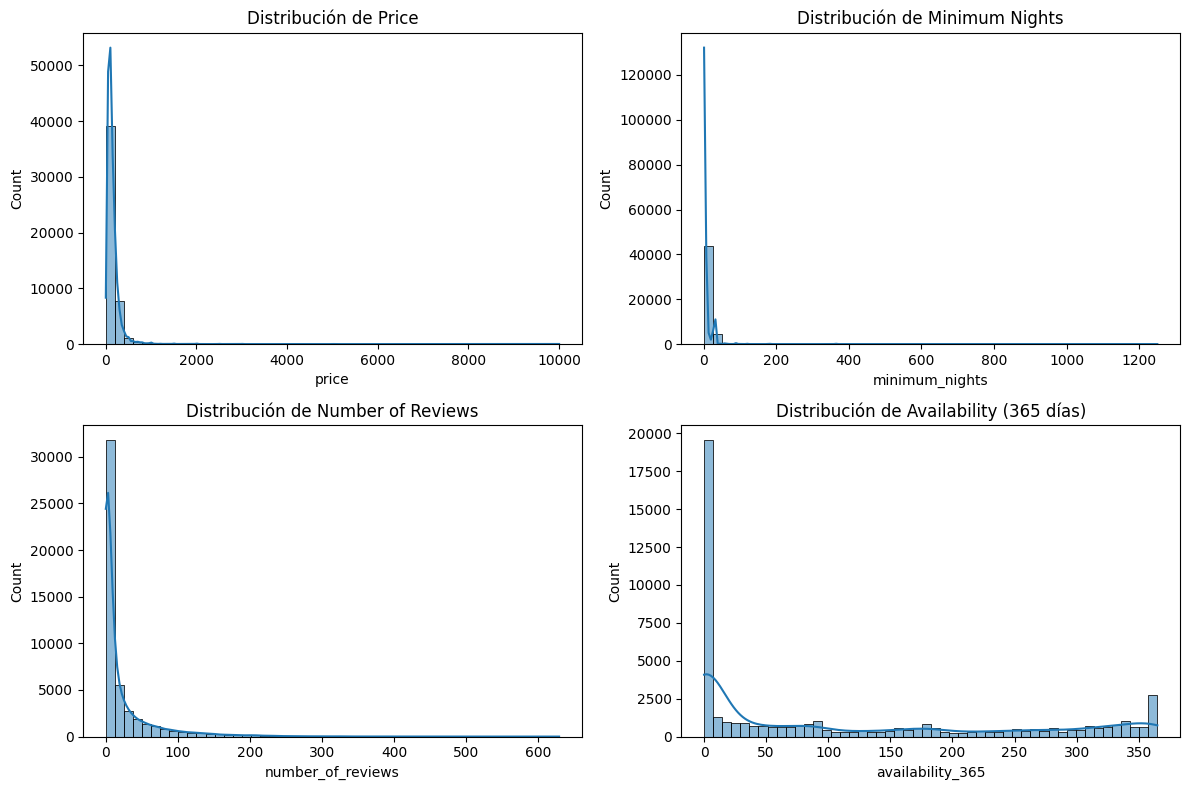

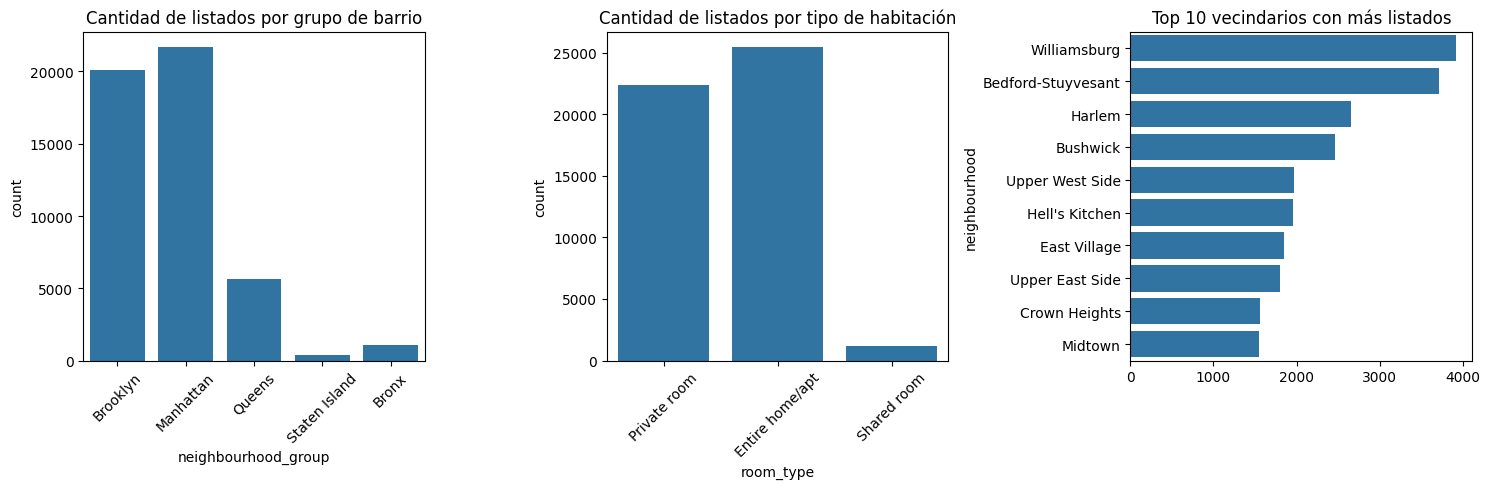

In [ ]:
# Identificar variables numéricas y categóricas
num_cols = test_data.select_dtypes(include=np.number).columns.tolist()
cat_cols = test_data.select_dtypes(exclude=np.number).columns.tolist()

# --- 1️⃣ Distribución de variables numéricas ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(test_data['price'], bins=50, kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribución de Price')

sns.histplot(test_data['minimum_nights'], bins=50, kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribución de Minimum Nights')

sns.histplot(test_data['number_of_reviews'], bins=50, kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribución de Number of Reviews')

sns.histplot(test_data['availability_365'], bins=50, kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribución de Availability (365 días)')

plt.tight_layout()
plt.show()

# --- 2️⃣ Frecuencia de variables categóricas ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(data=test_data, x='neighbourhood_group', ax=axes[0])
axes[0].set_title('Cantidad de listados por grupo de barrio')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=test_data, x='room_type', ax=axes[1])
axes[1].set_title('Cantidad de listados por tipo de habitación')
axes[1].tick_params(axis='x', rotation=45)

top_neigh = test_data['neighbourhood'].value_counts().head(10)
sns.barplot(x=top_neigh.values, y=top_neigh.index, ax=axes[2])
axes[2].set_title('Top 10 vecindarios con más listados')

plt.tight_layout()
plt.show()

/tmp/ipykernel_783/1163236768.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=test_data, x='neighbourhood_group', y='price', ci=None, estimator=np.mean)


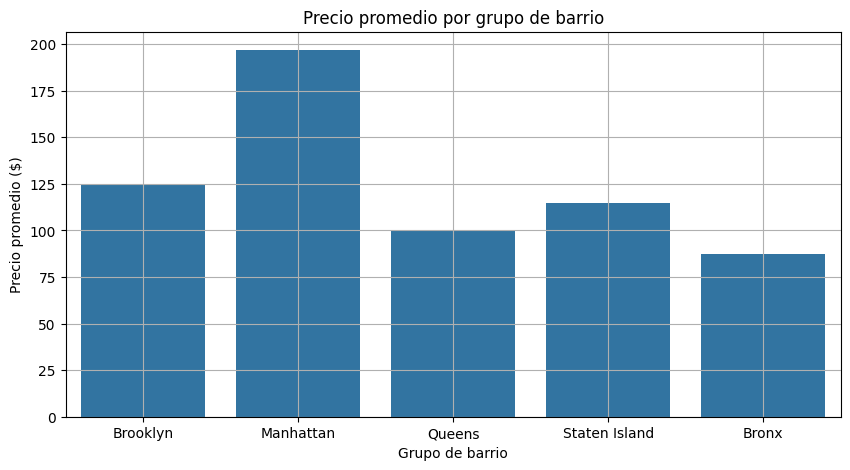

/tmp/ipykernel_783/1163236768.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=test_data, x='room_type', y='price', ci=None, estimator=np.mean)


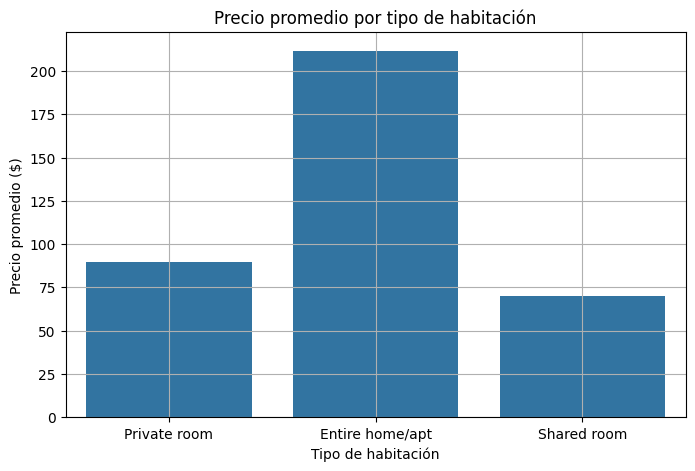

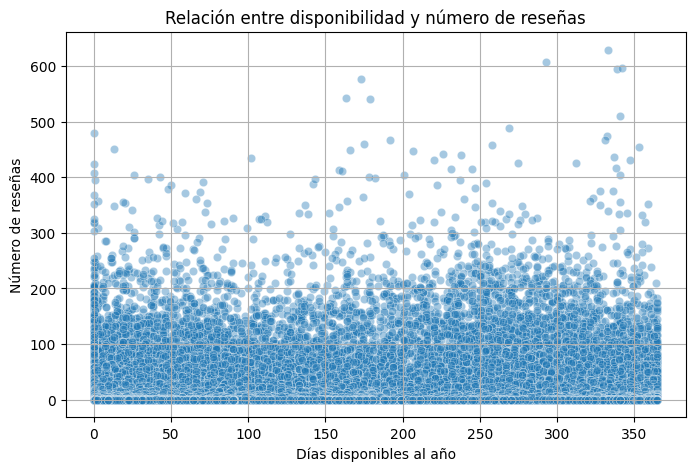

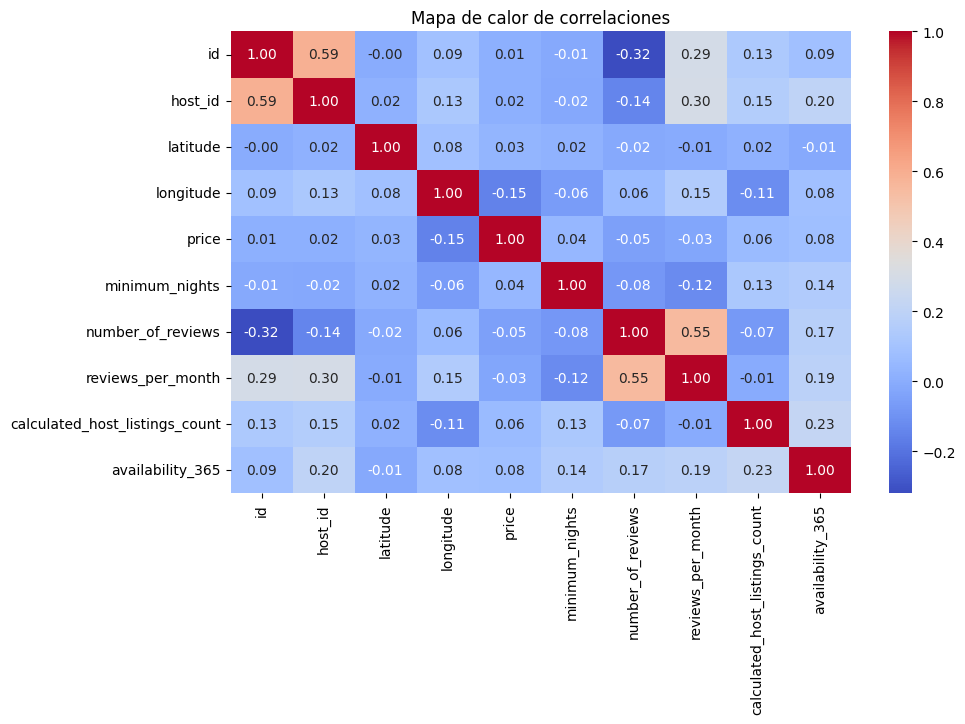

In [148]:
# 1️⃣ Precio promedio por grupo de barrio
plt.figure(figsize=(10, 5))
sns.barplot(data=test_data, x='neighbourhood_group', y='price', ci=None, estimator=np.mean)
plt.title('Precio promedio por grupo de barrio')
plt.ylabel('Precio promedio ($)')
plt.xlabel('Grupo de barrio')
plt.grid(True)
plt.show()

# 2️⃣ Precio promedio por tipo de habitación
plt.figure(figsize=(8, 5))
sns.barplot(data=test_data, x='room_type', y='price', ci=None, estimator=np.mean)
plt.title('Precio promedio por tipo de habitación')
plt.ylabel('Precio promedio ($)')
plt.xlabel('Tipo de habitación')
plt.grid(True)
plt.show()

# 3️⃣ Relación entre disponibilidad y número de reseñas
plt.figure(figsize=(8, 5))
sns.scatterplot(data=test_data, x='availability_365', y='number_of_reviews', alpha=0.4)
plt.title('Relación entre disponibilidad y número de reseñas')
plt.xlabel('Días disponibles al año')
plt.ylabel('Número de reseñas')
plt.grid(True)
plt.show()

# 4️⃣ Mapa de calor de correlaciones numéricas
plt.figure(figsize=(10, 6))
corr = test_data.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones')
plt.show()